The game is played with an infinite deck of cards (i.e. cards are sampled
with replacement)

Each draw from the deck results in a value between 1 and 10 (uniformly
distributed) with a colour of red (probability 1/3) or black (probability
2/3).

There are no aces or picture (face) cards in this game

At the start of the game both the player and the dealer draw one black
card (fully observed)

Each turn the player may either stick or hit

If the player hits then she draws another card from the deck

If the player sticks she receives no further cards

The values of the player’s cards are added (black cards) or subtracted (red
cards)

If the player’s sum exceeds 21, or becomes less than 1, then she “goes
bust” and loses the game (reward -1)

If the player sticks then the dealer starts taking turns. The dealer always
sticks on any sum of 17 or greater, and hits otherwise. If the dealer goes
bust, then the player wins; otherwise, the outcome – win (reward +1),
lose (reward -1), or draw (reward 0) – is the player with the largest sum.

Input - dealers first card, action

In [10]:
import random
from enum import Enum

In [2]:
class State:
    def __init__(self, dealer_card, player_card, is_terminal=False):
        """
        :type self.is_terminal: bool
        :type self.dealer: int
        :type self.player: int
        """
        self.dealer = dealer_card.value
        self.player = player_card.value
        self.term = is_terminal

In [29]:
class Card:
    def __init__(self, force_black=False):
        """
        :type self.value: int
        """

        self.value = random.randint(1,10)
        self.absolute_value = self.value
        if force_black or random.randint(1,3) != 1:
            self.is_black = True
        else:
            self.is_black = False
            self.value = 0 - self.value
        self.is_red = not self.is_black

In [30]:
from enum import Enum
class Actions(Enum):

    # Possible actions
    hit = 0
    stick = 1

    @staticmethod
    def get_action(n):
        return Actions.hit if n==0 else Actions.stick

In [31]:
def step(s, a):
    next_s = s
    r = 0
    if a == Actions.stick:
        while not next_s.term:
            next_s.dealer += Card().value
            if next_s.dealer < 1 or next_s.dealer > 21:
                next_s.term = True
                r = 1
            elif next_s.dealer >= 17:
                next_s.term = True
                if next_s.dealer > next_s.player:
                    r = -1
                elif next_s.dealer < next_s.player:
                    r = 1
    else:
        next_s.player += Card().value
        if next_s.player < 1 or next_s.player > 21:
            next_s.term = True
            r = -1
    return next_s, r

In [32]:
s = State(Card(True),Card(True))
a = Actions.hit

while not s.term:
    # print ("state = %d, %d" % (s.player, s.dealer, s.term))
    print ("state = %s, %s" % (s.player, s.dealer))
    if s.player >= 17:
        a = Actions.stick
    s, r = step(s, a)

print ("reward = %d" % (r))

state = 10, 3
state = 20, 3
reward = 1


In [33]:
def play():
    s = State(Card(True),Card(True))
    a = Actions.hit
    
    while not s.term:
        # print ("state = %d, %d" % (s.player, s.dealer, s.term))
        if s.player >= 14 or s.player < 9:
            a = Actions.stick
        s, r = step(s, a)
    return r

In [36]:
r = 0
from tqdm import trange
for i in range(0,100000):
    r += play()

print( "r = %s" % (round(1.0*r/i,2)))

r = 0.06


<IPython.core.display.Javascript object>


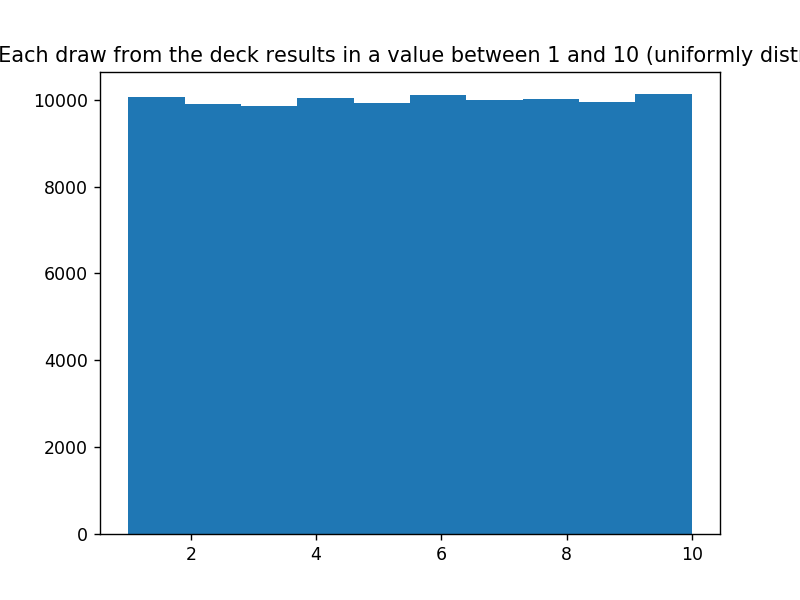

In [39]:
import matplotlib.pyplot as plt
#%matplotlib notebook
plt.figure(1)

values = []
for i in range(0,100000):
    values.append(Card().absolute_value)
    # values.append(random.randint(1,10))

plt.title('Test; Each draw from the deck results in a value between 1 and 10 (uniformly distributed)')
plt.hist(values)
  
         # , c='g', s=20, alpha=0.25, label='true positive')
plt.show()
#plt.savefig("#1-test1.png")

<IPython.core.display.Javascript object>


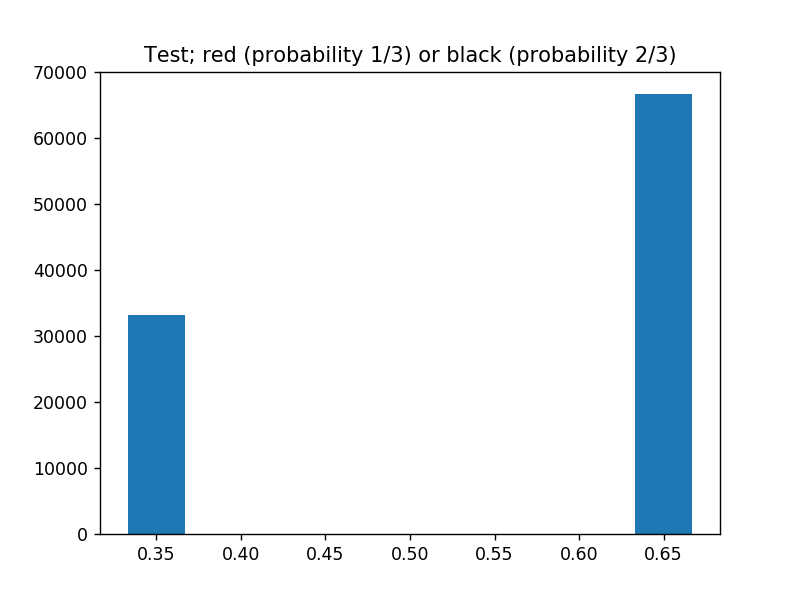

In [41]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure(2)

values = []
for i in range(0,100000):
    if (Card().is_black):
        values.append(0.6666666)
    else:
        values.append(0.3333333)

plt.title('Test; red (probability 1/3) or black (probability 2/3)')
plt.hist(values)
  
         # , c='g', s=20, alpha=0.25, label='true positive')
plt.show()
plt.savefig("#1-test2.png")

In [42]:
def play_test_player_bust():
    s = State(Card(True),Card(True))
    a = Actions.hit
    
    while not s.term:
        s, r = step(s, a)
        # print ("state = %s, %s, %s" % (s.player, s.dealer, s.term))
    return s, r


<IPython.core.display.Javascript object>


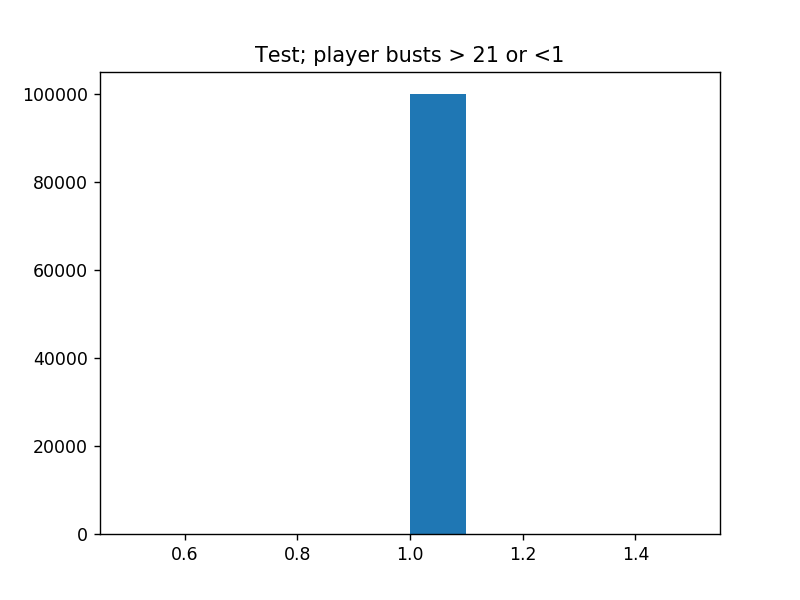

In [46]:
%matplotlib notebook
plt.figure(3)

values = []
for i in range(0,100000):
    s, r = play_test_player_bust()
    if s.player > 21:
        values.append(1)
    elif s.player < 1:
        values.append(1)
    else:
        values.append(-1)
        print ("error!!!!")
    

plt.title('Test; player busts > 21 or <1')
plt.hist(values)
  
         # , c='g', s=20, alpha=0.25, label='true positive')
plt.show()
#plt.savefig("#1-test3.png")